# Natural Language Processing Project

During this NLP project we will be attempting to classify Yelp Reviews into stars categories based off the text content in the reviews using the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user. The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better). In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business. The "useful" and "funny" columns are similar to the "cool" column.

## Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## The Data

In [3]:
data = pd.read_csv("yelp.csv")
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [5]:
data.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


Create a new column "text length" with number of words in text.

In [6]:
data['text length'] = data['text'].apply(lambda x: len(x.split()))
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,155
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,257
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,16
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,76
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,86


# EDA

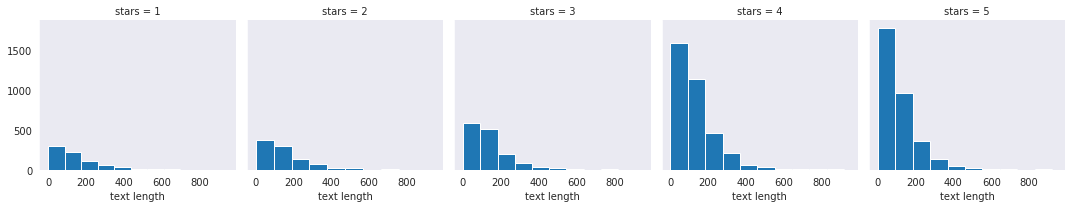

In [7]:
sns.set_style('dark')
grid = sns.FacetGrid(col = 'stars', data = data)
grid.map(plt.hist, 'text length', bins = 10)

Based off these histograms: most reviews contains less than 200 words and for each value of stars lower number of words dominates.

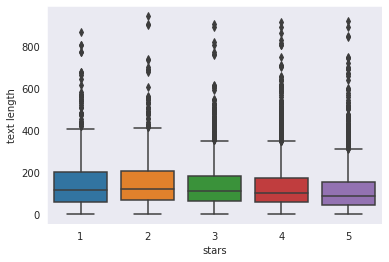

In [8]:
sns.boxplot(x = 'stars', y= 'text length', data = data)

Based off this boxplot: medians for 1 and 2 stars is about 175 words, and they're a little higher than medians of 3-5 stars.

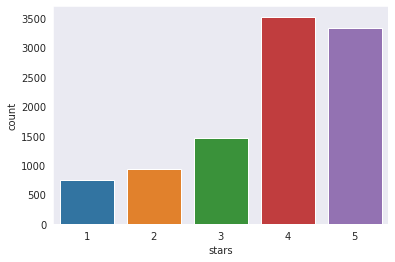

In [9]:
sns.countplot(x = 'stars', data = data)

Based off this countplot: the highest number is for 4 stars, a little less for 5 stars and decreasing for 3-5 stars.

Mean values for 1-5 stars: 

In [10]:
data_gb = data.groupby('stars').mean()
data_gb.head()

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,153.953271
2,0.719525,1.563107,0.875944,156.435814
3,0.788501,1.306639,0.694730,140.714579
4,0.954623,1.395916,0.670448,131.174135
5,0.944261,1.381780,0.608631,114.463590


Some correlation:

In [11]:
data_gb.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.865362
useful,-0.743329,1.000000,0.894506,0.697506
funny,-0.944939,0.894506,1.000000,0.847204
text length,-0.865362,0.697506,0.847204,1.000000


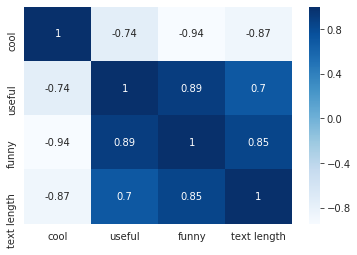

In [12]:
sns.heatmap(data_gb.corr(), cmap = "Blues", annot = True)

# NLP Classification Task

In [13]:
X = data['text']
Y = data['stars']

## Create a CountVectorizer object

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
model = CountVectorizer()
model.fit(X)
X = model.transform(X)

## Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

## Training a Model

In [16]:
from sklearn.naive_bayes import MultinomialNB

model_nb = MultinomialNB()
model_nb.fit(X_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Predictions and Evaluations

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

results_predict = model_nb.predict(X_test)
print(confusion_matrix(Y_test, results_predict))

[[ 57  46  13  80  26]
 [ 10  18  11 189  35]
 [  1  13  34 384  47]
 [ 10   2  15 768 250]
 [  5   1   7 436 542]]


In [18]:
print(classification_report(Y_test, results_predict))

              precision    recall  f1-score   support

           1       0.69      0.26      0.37       222
           2       0.23      0.07      0.10       263
           3       0.42      0.07      0.12       479
           4       0.41      0.73      0.53      1045
           5       0.60      0.55      0.57       991

    accuracy                           0.47      3000
   macro avg       0.47      0.34      0.34      3000
weighted avg       0.48      0.47      0.43      3000



Precision for 1 and 5 stars is acceptable, but for 2-4 is not. Repeat all these steps but only for 1 and 5 stars.

In [19]:
X_part = data[(data['stars'] == 1) | (data['stars'] == 5)]['text']
Y_part = data[(data['stars'] == 1) | (data['stars'] == 5)]['stars']

model_part = CountVectorizer()
model_part.fit(X_part)
X_part = model_part.transform(X_part)

X_part_train, X_part_test, Y_part_train, Y_part_test = train_test_split(X_part, Y_part, test_size = 0.3)

model_part_nb = MultinomialNB()
model_part_nb.fit(X_part_train, Y_part_train)

results_predict_part = model_part_nb.predict(X_part_test)
print(classification_report(Y_part_test, results_predict_part))

              precision    recall  f1-score   support

           1       0.87      0.67      0.75       231
           5       0.93      0.98      0.95       995

    accuracy                           0.92      1226
   macro avg       0.90      0.82      0.85      1226
weighted avg       0.91      0.92      0.91      1226



In this case precision, recall for 1 and 5 stars is a lot more.

# Using Text Processing

In [20]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

model_cl = Pipeline([
    ('model_pp_cv', CountVectorizer()),
    ('model_pp_tf', TfidfTransformer()),
    ('model_pp_nb', MultinomialNB())
])

model_part_cl = Pipeline([
    ('model_pp_cv', CountVectorizer()),
    ('model_pp_tf', TfidfTransformer()),
    ('model_pp_nb', MultinomialNB())
])

## Using the Pipeline

**For all stars**

In [21]:
X = data['text']
Y = data['stars']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)
model_cl.fit(X_train, Y_train)

Pipeline(memory=None,
         steps=[('model_pp_cv',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('model_pp_tf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('model_pp_nb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

**For 1 and 5 stars only**

In [22]:
X_part = data[(data['stars'] == 1) | (data['stars'] == 5)]['text']
Y_part = data[(data['stars'] == 1) | (data['stars'] == 5)]['stars']
X_part_train, X_part_test, Y_part_train, Y_part_test = train_test_split(X_part, Y_part, test_size = 0.3)
model_part_cl.fit(X_part_train, Y_part_train)

Pipeline(memory=None,
         steps=[('model_pp_cv',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('model_pp_tf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('model_pp_nb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

### Predictions and Evaluation

**For all stars**

In [23]:
predict_cl = model_cl.predict(X_test)
print(classification_report(Y_test, predict_cl))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       232
           2       0.00      0.00      0.00       281
           3       0.00      0.00      0.00       454
           4       0.38      0.89      0.53      1059
           5       0.66      0.34      0.45       974

    accuracy                           0.43      3000
   macro avg       0.21      0.25      0.20      3000
weighted avg       0.35      0.43      0.33      3000



/home/vazh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
predict_part_cl = model_part_cl.predict(X_part_test)
print(classification_report(Y_part_test, predict_part_cl))

              precision    recall  f1-score   support

           1       1.00      0.00      0.01       219
           5       0.82      1.00      0.90      1007

    accuracy                           0.82      1226
   macro avg       0.91      0.50      0.46      1226
weighted avg       0.85      0.82      0.74      1226



In both cases Tf-idf made results much worse. 